# Concurrent Data Loader

A continuación se desarrollan pruebas para evaluar el desempeño de dos tipos de data loaders de imágenes de pokemones:
- **Iterador básico**, que recorre el conjunto de archivos CSV que contienen la información de los pokemon fila por fila, y carga las imágenes almacenadas de forma secuencial.
- **Iterador con enfoque productor-consumidor** con espera en cola, donde un hilo lee las filas y las pone en cola, mientras que los consumidores extraen trabajos y lo procesan en paralelo.

## Preparación del entorno y los datos

In [1]:
# Establecer el path para importar desde src
import sys, os, pathlib
sys.path.append(os.path.abspath("src"))

In [ ]:
# Descarga concurrente de imágenes de pokemones desde archivos CSV
# ---> Solo correr una vez para descargar concurrentemente las imágenes <---
from src.loader import main
from src.utils import ensure_dir
import glob

csv_files = glob.glob('data/pokemon-*.csv')
output_dir = 'output/pokemons'
ensure_dir(output_dir)

main(csv_files, output_dir, num_threads=5)

In [3]:
# Verifica la descarga y cuenta el número de imágenes en todos los subdirectorios de output_dir
downloaded_images = glob.glob(os.path.join(output_dir, '**', '*.png'), recursive=True)
num_downloaded = len(downloaded_images)
print(f"Número de imágenes descargadas (incluyendo subdirectorios): {num_downloaded}")
print(f"Tipos de pokemones descargados: {set(os.path.basename(os.path.dirname(img)) for img in downloaded_images)}")

Número de imágenes descargadas (incluyendo subdirectorios): 721
Tipos de pokemones descargados: {'dark', 'fairy', 'ghost', 'grass', 'ice', 'steel', 'electric', 'normal', 'water', 'rock', 'poison', 'fighting', 'dragon', 'bug', 'flying', 'psychic', 'ground', 'fire'}


## Ejecución del iterador básico

In [4]:
# Definir el directorio de datos y buscar archivos CSV
import glob
import os
from src.utils import ensure_dir
data_dir = 'data'
csv_files = glob.glob(os.path.join(data_dir, '*.csv'))
print(f'Se encontraron {len(csv_files)} archivos CSV en {data_dir}')

Se encontraron 6 archivos CSV en data


09:12:54: Iterador básico: imagen (bulbasaur) cargada en 0.08962s


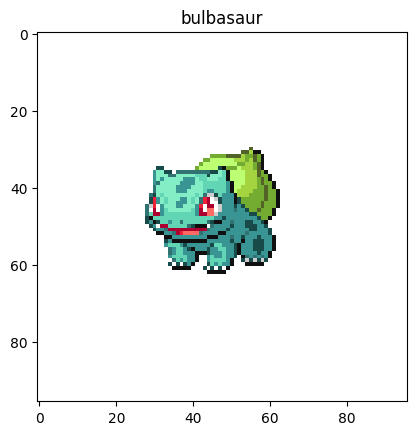

09:12:54: Iterador básico: imagen (ivysaur) cargada en 0.01021s
09:12:54: Iterador básico: imagen (venusaur) cargada en 0.01106s
09:12:54: Iterador básico: imagen (charmander) cargada en 0.00876s
09:12:54: Iterador básico: imagen (charmeleon) cargada en 0.01035s
09:12:54: Iterador básico: imagen (charizard) cargada en 0.00988s
09:12:54: Iterador básico: imagen (squirtle) cargada en 0.01860s
09:12:54: Iterador básico: imagen (wartortle) cargada en 0.02048s
09:12:54: Iterador básico: imagen (blastoise) cargada en 0.01182s
09:12:54: Iterador básico: imagen (caterpie) cargada en 0.01207s
09:12:54: Iterador básico: imagen (metapod) cargada en 0.00850s
09:12:54: Iterador básico: imagen (butterfree) cargada en 0.00955s
09:12:54: Iterador básico: imagen (weedle) cargada en 0.00798s
09:12:54: Iterador básico: imagen (kakuna) cargada en 0.00885s
09:12:54: Iterador básico: imagen (beedrill) cargada en 0.01016s
09:12:54: Iterador básico: imagen (pidgey) cargada en 0.00799s
09:12:54: Iterador básic

721

In [5]:
from src.iterator import test_iterator
# Directorio donde se encuentran las imagenes descargadas
img_dir = 'output/pokemons'
ensure_dir(img_dir)
# Directorio para guardar los tiempos de carga de las imagenes
times_dir = 'output/tiempos'
ensure_dir(times_dir)
# Archivo para almacenar los tiempos de carga
times_file = os.path.join(times_dir, 'iterador_basico_tiempos.csv')
test_iterator(csv_files, img_dir, times_file)

El iterador básico está diseñado para mostrar logs del tiempo que tarda cada imagen en cargar, y además guarda un csv con los datos del nombre y tipo de pokemon, y el tiempo que tardó en cargar.
## Ejecucion del iterador con cola

09:13:08: Productor: bulbasaur añadido a la fila


09:13:08: Productor: ivysaur añadido a la fila
09:13:08: Productor-Consumidor: imagen (bulbasaur) cargada en 0.00274s
09:13:08: Productor: venusaur añadido a la fila
09:13:08: Productor: charmander añadido a la fila
09:13:08: Productor: charmeleon añadido a la fila
09:13:08: Productor: charizard añadido a la fila
09:13:08: Productor: squirtle añadido a la fila
09:13:08: Productor: wartortle añadido a la fila
09:13:08: Productor: blastoise añadido a la fila
09:13:08: Productor: caterpie añadido a la fila
09:13:08: Productor: metapod añadido a la fila
09:13:08: Productor: butterfree añadido a la fila
09:13:08: Productor: weedle añadido a la fila
09:13:08: Productor: kakuna añadido a la fila
09:13:08: Productor: beedrill añadido a la fila
09:13:08: Productor: pidgey añadido a la fila
09:13:08: Productor: pidgeotto añadido a la fila
09:13:08: Productor: pidgeot añadido a la fila
09:13:08: Productor: rattata añadido a la fila
09:13:08: Productor: raticate añadido a la fila
09:13:08: Product

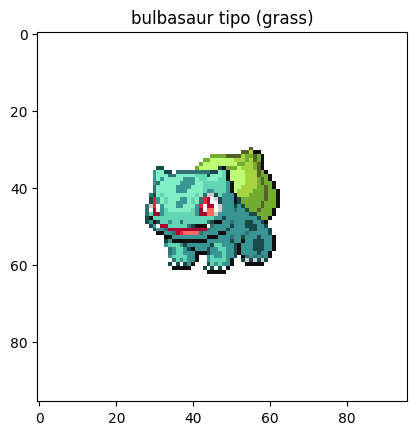

09:13:08: Productor: fearow añadido a la fila
09:13:08: Productor-Consumidor: imagen (ivysaur) cargada en 0.00127s
09:13:08: Productor: ekans añadido a la fila
09:13:08: Productor-Consumidor: imagen (venusaur) cargada en 0.00131s
09:13:08: Productor: arbok añadido a la fila
09:13:08: Productor-Consumidor: imagen (charmander) cargada en 0.00128s
09:13:08: Productor: pikachu añadido a la fila
09:13:08: Productor-Consumidor: imagen (charmeleon) cargada en 0.00101s
09:13:08: Productor: raichu añadido a la fila
09:13:08: Productor-Consumidor: imagen (charizard) cargada en 0.00136s
09:13:08: Productor: sandshrew añadido a la fila
09:13:08: Productor-Consumidor: imagen (squirtle) cargada en 0.00136s
09:13:08: Productor: sandslash añadido a la fila
09:13:08: Productor-Consumidor: imagen (wartortle) cargada en 0.00182s
09:13:08: Productor: nidoran-f añadido a la fila
09:13:08: Productor-Consumidor: imagen (blastoise) cargada en 0.00166s
09:13:08: Productor: nidorina añadido a la fila
09:13:08: 

721

In [ ]:
from src.iterator import test_pipeline
# CSV para almacenar los tiempos del iterador con pipeline productor-consumidor
pipeline_times_file = os.path.join(times_dir, 'pipeline_tiempos.csv')
test_pipeline(csv_files, img_dir, csv_output=pipeline_times_file) # La cola por defecto es de tamaño 20

Este dataloader esta diseñado para mostrar registros de las tareas que el productor añade a la cola, además del nombre y tiempo de consumo de las imagenes.  
# Evaluacion del desempeño
1- Se analizarán las estadísticas de los tiempos de descarga del iterador básico vs el productor-consumidor


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los csv de tiempos y calcular estadísticas
iterator_times = pd.read_csv(times_file)
queue_times = pd.read_csv(pipeline_times_file)

Estadísticas de tiempos de carga (segundos):
                Iterativo  Productor-Consumidor
Media            0.016421              0.001269
Mediana          0.015460              0.001090
Desv. Estándar   0.007913              0.000660
Mínimo           0.007210              0.000280
Máximo           0.089620              0.005040
Suma total      11.839260              0.915030


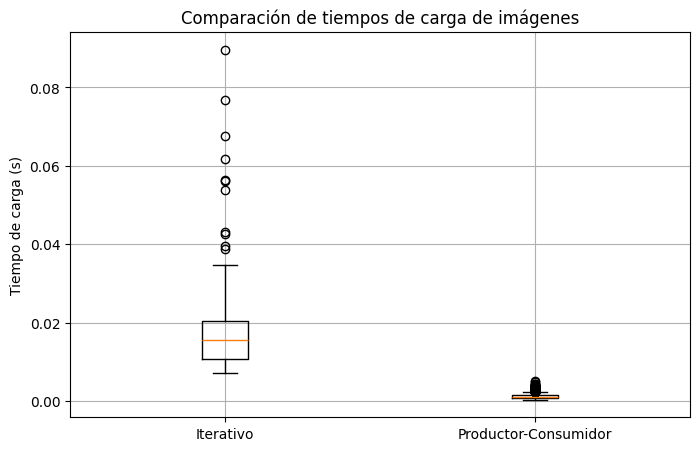

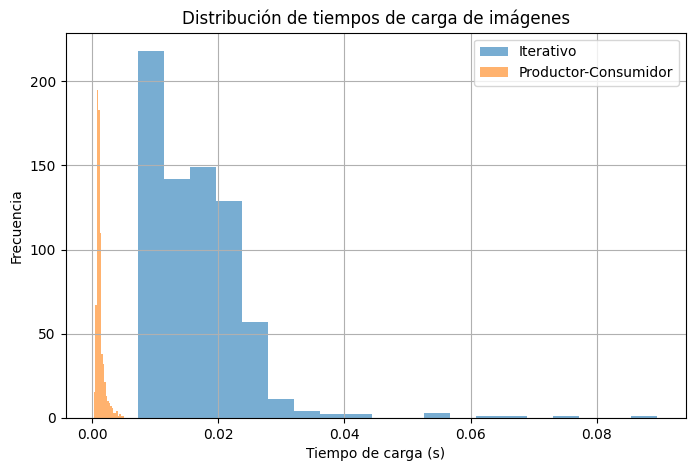

,Iterativo,Productor-Consumidor
Media,0.016421,0.001269
Mediana,0.015460,0.001090
Desv. Estándar,0.007913,0.000660
Mínimo,0.007210,0.000280
Máximo,0.089620,0.005040
Suma total,11.839260,0.915030


In [8]:
from src.utils import analyze_load_times
# Analizar y graficar los tiempos de carga
analyze_load_times(times_file, pipeline_times_file)

Podemos ver que los tiempos de carga usando el enfoque productor-consumidor superan significativamente al iterador básico según las estadísticas. Además la distribución de los tiempos del iterador básico es mucho más disperso como se puede ver en el boxplot. Finalmente, ambos dataloaders tienen una distribución sesgada a la izquierda, pero el productor-consumidor es bastante compacto y el iterador básico tiene presencia de outliers. 

Ahora vamos a ver qué pasa si se juega con diferentes tamaños de cola, usando configuraciones diferentes al default y comparemos los tiempos de cada configuracion con el iterativo básico


Probando 5 tamaños de cola diferentes: [5, 10, 30, 50, 100]
Cola tamaño 5: 721 imágenes procesadas en 0.24 segundos
Cola tamaño 10: 721 imágenes procesadas en 0.21 segundos
Cola tamaño 30: 721 imágenes procesadas en 0.20 segundos
Cola tamaño 50: 721 imágenes procesadas en 0.22 segundos
Cola tamaño 100: 721 imágenes procesadas en 0.24 segundos

Resumen guardado en output\tiempos\queue_sizes\queue_sizes_summary.csv
Resultados por tamaño de cola:


,queue_size,processed_images,total_time,avg_time,median_time,min_time,max_time
0,5,721,0.239373,0.000311,0.00023,0.00017,0.00146
1,10,721,0.214328,0.000279,0.00024,0.00017,0.00154
2,30,721,0.204376,0.000262,0.00022,0.00014,0.00104
3,50,721,0.224024,0.000288,0.00023,0.00014,0.00145
4,100,721,0.237217,0.000309,0.00025,0.00016,0.00125


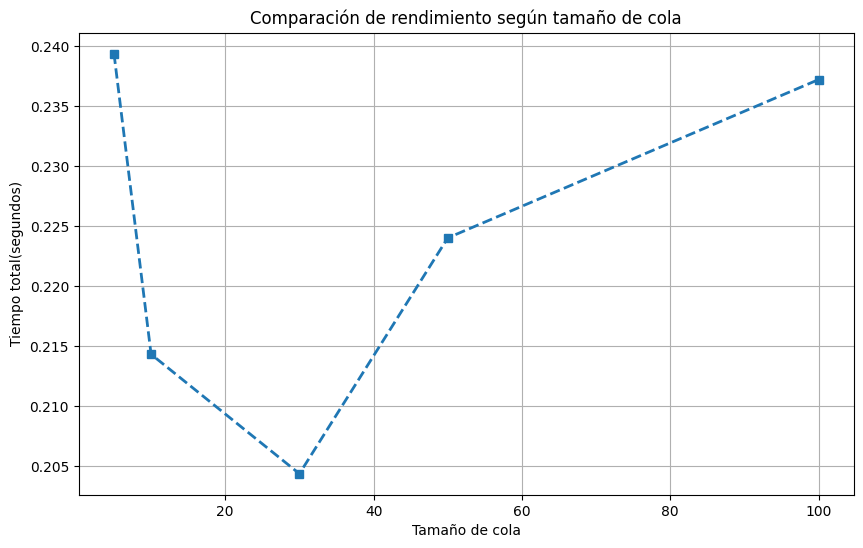

In [9]:
# Probar diferentes tamaños de cola
from src.queue_tester import test_different_queue_sizes, plot_queue_performance
queue_sizes = [5, 10, 30, 50, 100]
queue_performance = test_different_queue_sizes(csv_files, img_dir, queue_sizes)

# Mostrar tabla de resultados
print("Resultados por tamaño de cola:")
display(queue_performance)
plot_queue_performance(queue_performance)

Al probar con estos cinco tamaños diferentes de cola se observa que el tiempo más optimo está en torno del tamaño de cola $=30$, y con tamaños menores o mayores, aumenta el tiempo que tarda cargar las imágenes en total.

Ahora vamos a comparar los tiempos totales y promedio con el iterador básico

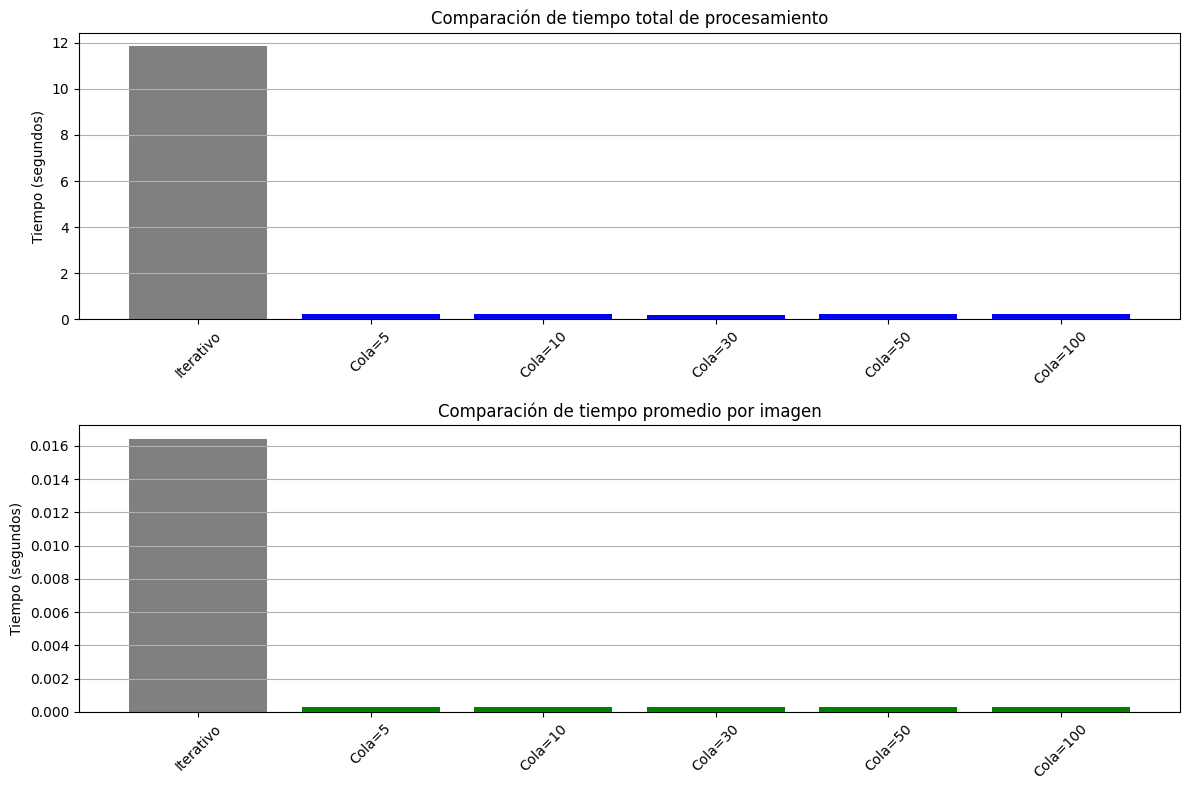

Comparación con iterador básico:


,Método,Tiempo total (s),Tiempo promedio (s),Imágenes
0,Iterativo,11.839260,0.016421,721
1,Cola=5,0.239373,0.000311,721
2,Cola=10,0.214328,0.000279,721
3,Cola=30,0.204376,0.000262,721
4,Cola=50,0.224024,0.000288,721
5,Cola=100,0.237217,0.000309,721


In [10]:
from src.queue_tester import compare_with_basic_iterator
# Comparar con el iterador básico
comparison_summary = compare_with_basic_iterator(queue_performance, times_file, queue_sizes)

# Mostrar tabla comparativa
print("Comparación con iterador básico:")
display(comparison_summary)

Para concluir, los tiempos de carga de las imágenes usando el dataloader con enfoque productor-consumidor son menores y más consistentes que con el iterador básico, por lo que en este caso se recomienda usar este enoque para disponibilizar las imágenes con posibilidad de solapamiento entre tareas I/O y CPU, aumentando el rendimiento de las operaciones limitadas por I/O, pero se debe tener cuidado con la sintonización de los parámetros según la tarea específica y los recursos computacionales disponibles.